# Sparse Network Control

The goal of this notebook is to implement a decision tree for predicting the control cost of the networks based.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Upload Dataset

In [2]:
df = pd.read_csv('NetworksData.csv')
from sklearn.utils import shuffle
df =shuffle(df)

## Exploratory Data Analysis (EDA) 

In [3]:
df.head()

,netID,tau,sigma,modularity,clustering,avg_Path,assortativity,core_periphery,page_rank,cost1,cost2,cost3,cost4
1121,1122,10.00000,7.900,0.280844,0.290936,2.373282,-0.242647,0.603333,10.499399,20.434676,28.871391,49.121217,86.040122
183,184,0.00001,0.964,0.732017,0.516268,3.723636,0.122556,0.103333,1.600767,14.683559,19.626805,39.514115,114.628149
266,267,1.00000,1.260,0.799900,0.689413,4.782424,0.012108,0.160000,1.442566,16.365327,19.475617,34.649999,112.004176
933,934,8.00000,8.850,0.341572,0.513273,2.327843,-0.319819,0.633333,10.270378,21.581676,29.368253,46.553312,86.131112
449,450,3.00000,1.990,0.766526,0.646731,4.922626,0.069683,0.249900,1.729471,16.185733,19.557035,38.035195,124.409491


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1121 to 452
Data columns (total 13 columns):
netID             1200 non-null int64
tau               1200 non-null float64
sigma             1200 non-null float64
modularity        1200 non-null float64
clustering        1200 non-null float64
avg_Path          1200 non-null float64
assortativity     1200 non-null float64
core_periphery    1200 non-null float64
page_rank         1200 non-null float64
cost1             1200 non-null float64
cost2             1200 non-null float64
cost3             1200 non-null float64
cost4             1200 non-null float64
dtypes: float64(12), int64(1)
memory usage: 131.2 KB


In [5]:
df.describe()

,netID,tau,sigma,modularity,clustering,avg_Path,assortativity,core_periphery,page_rank,cost1,cost2,cost3,cost4
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,4.583334,4.513590,0.535005,0.487830,3.371041,-0.182949,0.436250,4.589414,19.035368,25.113126,44.645326,109.949693
std,346.554469,3.329507,3.759099,0.222684,0.222839,1.169072,0.239572,0.257793,4.253079,5.236591,5.509910,6.400049,16.595413
min,1.000000,0.000000,0.651000,0.138644,0.031590,1.911842,-0.744628,0.056667,1.184151,12.992123,18.760077,29.835070,73.788355
25%,300.750000,1.750000,1.850000,0.360188,0.324246,2.630556,-0.334952,0.240000,1.674317,14.804785,20.965852,39.331033,98.319300
50%,600.500000,4.500000,2.640000,0.547450,0.573034,3.001818,-0.106552,0.349375,2.123512,17.068411,23.257665,45.303557,116.551182
75%,900.250000,7.250000,6.440000,0.755958,0.670961,4.005690,-0.008508,0.616667,7.247359,22.500058,28.208473,50.521032,121.181812
max,1200.000000,10.000000,12.800000,0.874533,0.791349,8.240808,0.348746,0.990000,14.918929,35.172410,41.388247,58.311874,138.401406


In [6]:
df_netproperties = df[df.columns[1:9]]
df_netproperties.head()

,tau,sigma,modularity,clustering,avg_Path,assortativity,core_periphery,page_rank
1121,10.00000,7.900,0.280844,0.290936,2.373282,-0.242647,0.603333,10.499399
183,0.00001,0.964,0.732017,0.516268,3.723636,0.122556,0.103333,1.600767
266,1.00000,1.260,0.799900,0.689413,4.782424,0.012108,0.160000,1.442566
933,8.00000,8.850,0.341572,0.513273,2.327843,-0.319819,0.633333,10.270378
449,3.00000,1.990,0.766526,0.646731,4.922626,0.069683,0.249900,1.729471


C:\Users\localadmin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\localadmin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


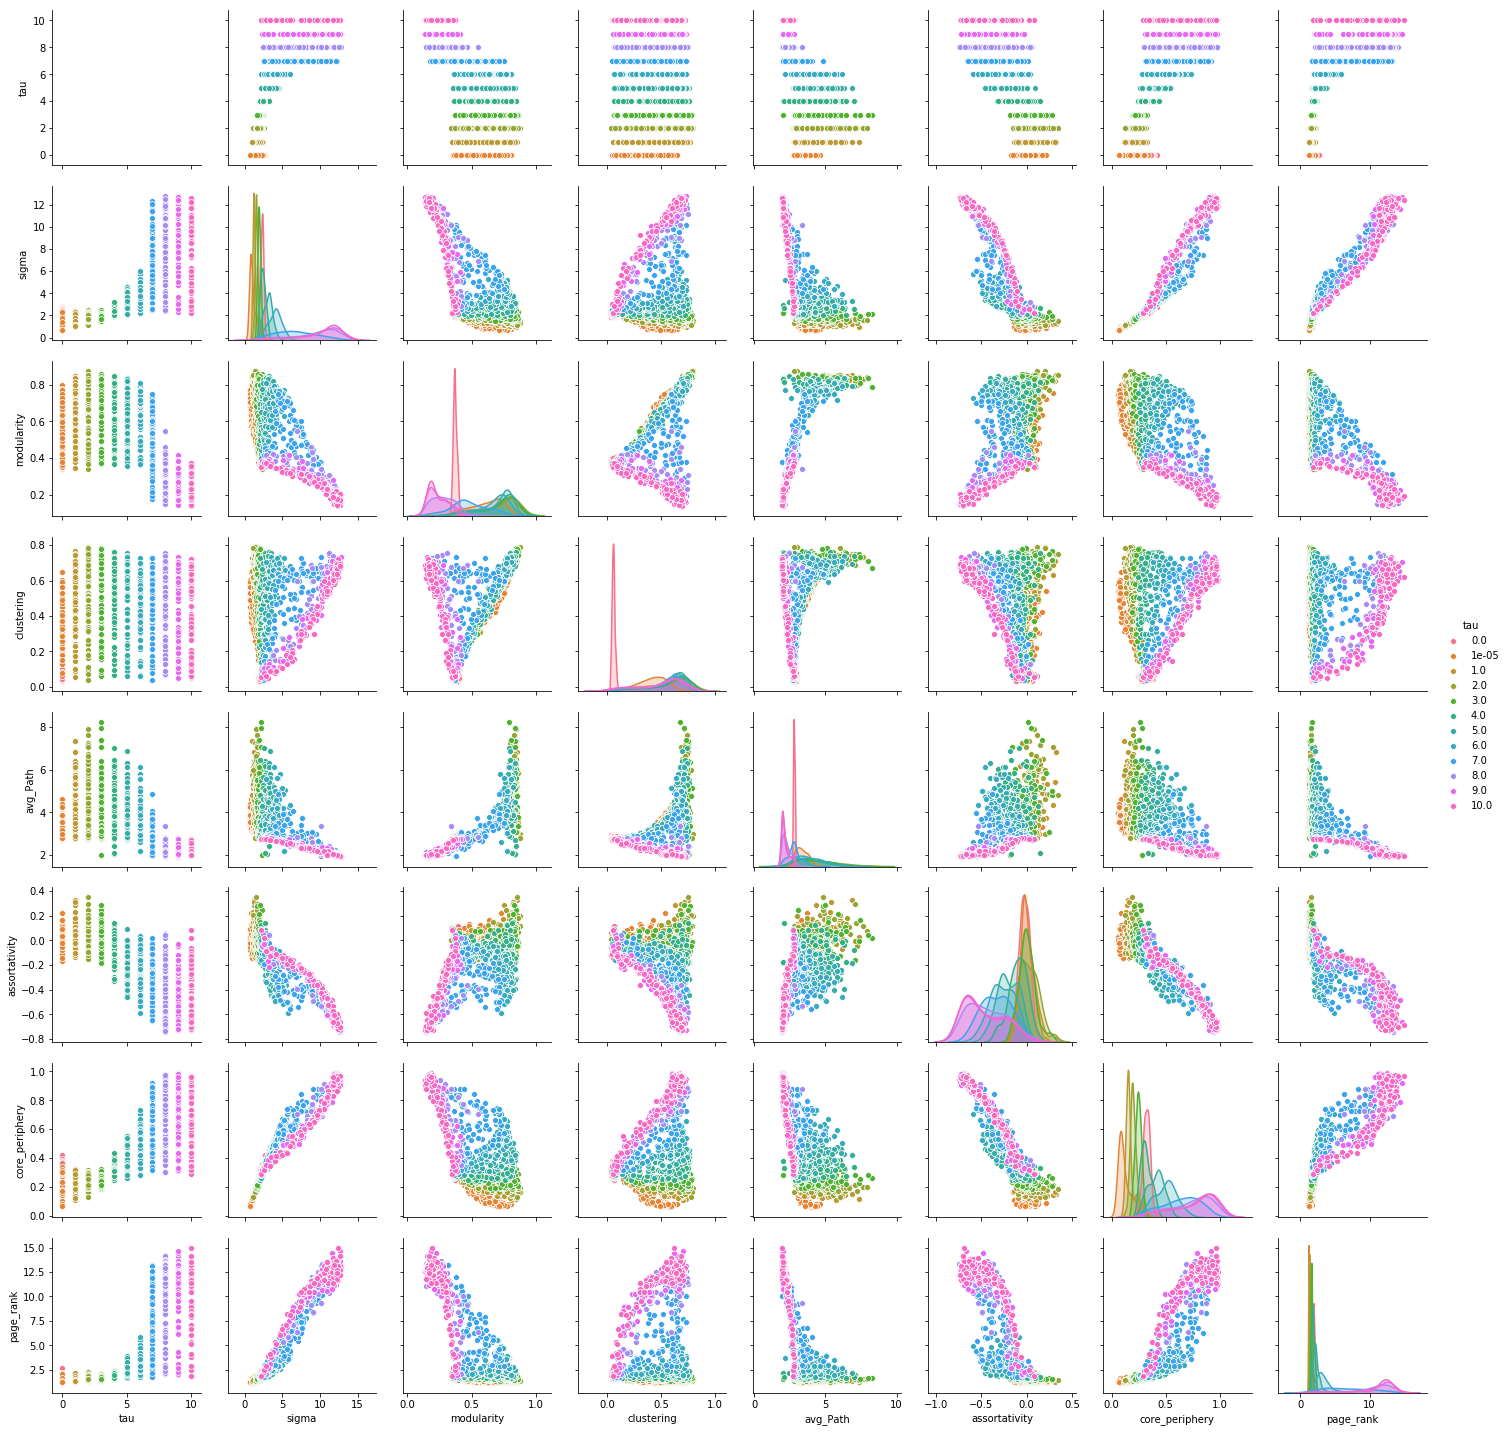

In [7]:
sns.pairplot(df_netproperties, hue='tau')

In [8]:
df_control = df[df.columns[9:]]
df_control.head()

,cost1,cost2,cost3,cost4
1121,20.434676,28.871391,49.121217,86.040122
183,14.683559,19.626805,39.514115,114.628149
266,16.365327,19.475617,34.649999,112.004176
933,21.581676,29.368253,46.553312,86.131112
449,16.185733,19.557035,38.035195,124.409491


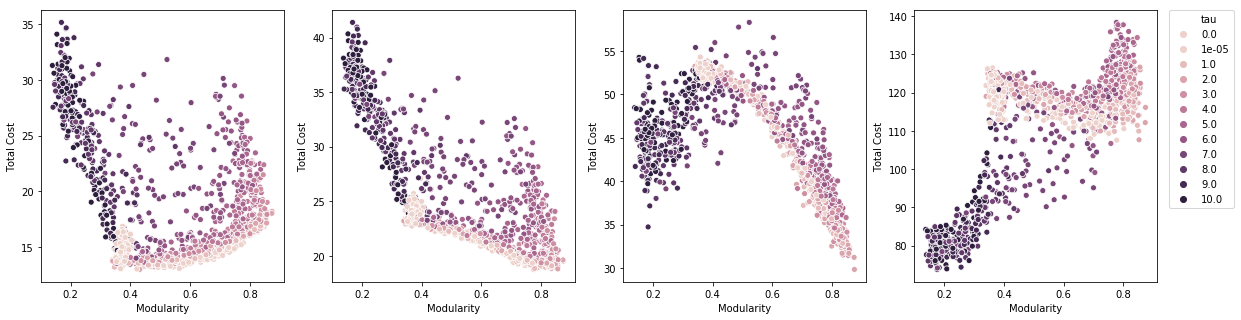

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.scatterplot(data=df,x='modularity', y='cost1',hue='tau',legend=False)
plt.xlabel('Modularity')
plt.ylabel('Total Cost')
plt.subplot(1,4,2)
sns.scatterplot(data=df,x='modularity', y='cost2', hue='tau',legend=False)
plt.xlabel('Modularity')
plt.ylabel('Total Cost')
plt.subplot(1,4,3)
sns.scatterplot(data=df,x='modularity', y='cost3', hue='tau',legend=False)
plt.xlabel('Modularity')
plt.ylabel('Total Cost')
plt.subplot(1,4,4)
sns.scatterplot(data=df,x='modularity', y='cost4', hue='tau',legend='full')
plt.xlabel('Modularity')
plt.ylabel('Total Cost')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Regressors


In [32]:
#X = df_netproperties.drop(['tau'], axis=1)
X = df[df.columns[2:9]].drop(['core_periphery'], axis=1)
y = df_control['cost3']

### Linear Models

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
reg_score = reg.score(X, y)

In [34]:
from sklearn.linear_model import ElasticNet
elast = ElasticNet(random_state=0)
elast.fit(X, y)
elast_score = elast.score(X, y)

In [35]:
from sklearn.linear_model import ElasticNetCV
elastCV = ElasticNetCV(cv=5, random_state=0)
elastCV.fit(X, y)
elastCV_score = elastCV.score(X, y)

In [36]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()
huber.fit(X, y)
huber_score = huber.score(X, y)

In [37]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X,y)
lasso_score = lasso.score(X,y)

In [38]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.1)
clf.fit(X, y)
ridge_score = clf.score(X,y)

In [39]:
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X, y)
SGDR_score = clf.score(X,y)

In [40]:
from sklearn.model_selection import cross_validate

### KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5).fit(X, y)
cv_results_neigh = cross_validate(neigh,X,y,cv=10,scoring=['r2','neg_mean_absolute_error'],return_train_score=False)
neigh_score= np.average(cv_results_neigh['test_r2'])
neigh_score2 = -np.average(cv_results_neigh['test_neg_mean_absolute_error'])

### Support Vector

In [42]:
from sklearn.svm import SVR
svr = SVR(C=5.0, epsilon=0.3).fit(X,y)
cv_results_svr = cross_validate(svr,X,y,cv=10,scoring=['r2','neg_mean_absolute_error'],return_train_score=False)
svr_score= np.average(cv_results_svr['test_r2'])
svr_score2 = -np.average(cv_results_svr['test_neg_mean_absolute_error'])

### Linear Support Vector

In [43]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=0, tol=1e-5, C=5.0, epsilon=0.3).fit(X,y)
cv_results_lsvr = cross_validate(lsvr,X,y,cv=10,scoring=['r2','neg_mean_absolute_error'],return_train_score=False)
lsvr_score= np.average(cv_results_lsvr['test_r2'])
lsvr_score2 = -np.average(cv_results_lsvr['test_neg_mean_absolute_error'])

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor().fit(X,y)
cv_results_dtree = cross_validate(dtree,X,y,cv=10,scoring=['r2','neg_mean_absolute_error'],return_train_score=False)
dtree_score = np.average(cv_results_dtree['test_r2'])
dtree_score2 = -np.average(cv_results_dtree['test_neg_mean_absolute_error'])

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=300).fit(X,y)
cv_results_rfc = cross_validate(rfc,X,y,cv=10,scoring=['r2','neg_mean_absolute_error'],return_train_score=False)
rfc_score= np.average(cv_results_rfc['test_r2'])
rfc_score2 = -np.average(cv_results_rfc['test_neg_mean_absolute_error'])

### AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=0).fit(X,y)
cv_results_adab = cross_validate(adab,X,y,cv=10,scoring=['r2','neg_mean_absolute_error'],return_train_score=False)
adab_score= np.average(cv_results_adab['test_r2'])
adab_score2 = -np.average(cv_results_adab['test_neg_mean_absolute_error'])

### XGBoost

In [47]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300,learning_rate=0.05).fit(X, y, verbose=False)
cv_results_xgb = cross_validate(xgb,X,y,cv=10,scoring=['r2','neg_mean_absolute_error'],return_train_score=False)
xgb_score= np.average(cv_results_xgb['test_r2'])
xgb_score2 = -np.average(cv_results_xgb['test_neg_mean_absolute_error'])

### Gaussian Process

In [48]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X, y)
cv_results_gpr = cross_validate(gpr,X,y,cv=10,scoring=['r2','neg_mean_absolute_error'],return_train_score=False)
gpr_score= np.average(cv_results_gpr['test_r2'])
gpr_score2 = -np.average(cv_results_gpr['test_neg_mean_absolute_error'])

### Multi-layer Perceptron

In [49]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs',max_iter=5000,random_state=0).fit(X,y)
cv_results_mlp = cross_validate(mlp,X,y,cv=10,scoring=['r2','neg_mean_absolute_error'],return_train_score=False)
mlp_score= np.average(cv_results_mlp['test_r2'])
mlp_score2 = -np.average(cv_results_mlp['test_neg_mean_absolute_error'])

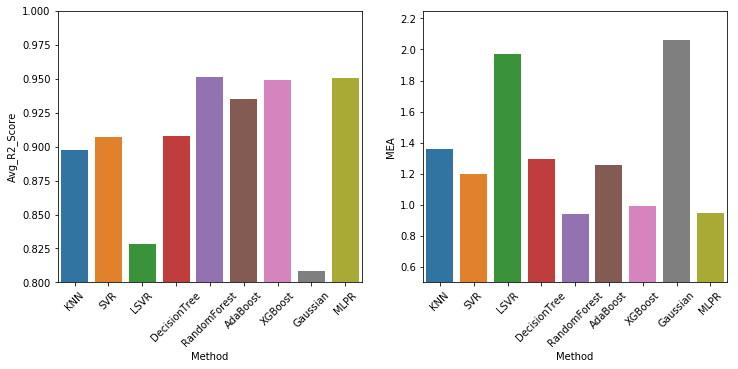

In [50]:
method = ['KNN','SVR','LSVR','DecisionTree','RandomForest','AdaBoost','XGBoost','Gaussian','MLPR']
nonlinear_score = [neigh_score,svr_score,lsvr_score,dtree_score,rfc_score,adab_score,xgb_score,gpr_score,mlp_score]
nonlinear_score2 = [neigh_score2,svr_score2,lsvr_score2,dtree_score2,rfc_score2,adab_score2,xgb_score2,gpr_score2,mlp_score2]
d = {'Method':method,'Avg_R2_Score':nonlinear_score,'MEA':nonlinear_score2}
NonLineardf = pd.DataFrame(data=d)

# Plot Results to Compare Methods
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.ylim([0.8,1.0])
plt.xticks(rotation=45)
sns.barplot(data=NonLineardf,x='Method',y='Avg_R2_Score')
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.ylim([0.5,2.25])
sns.barplot(data=NonLineardf,x='Method',y='MEA')


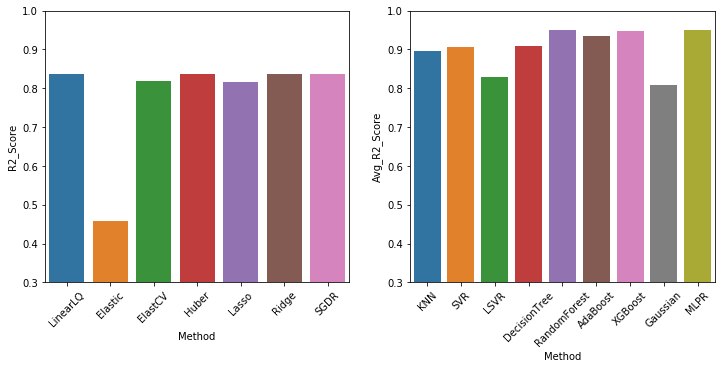

In [51]:
method = ['LinearLQ','Elastic','ElastCV','Huber','Lasso','Ridge','SGDR']
linear_score = [reg_score,elast_score,elastCV_score,huber_score,lasso_score,ridge_score,SGDR_score]
d = {'Method':method,'R2_Score':linear_score}
Lineardf = pd.DataFrame(data=d)

# Plot Results to Compare Methods
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.ylim([0.3,1])
plt.xticks(rotation=45)
sns.barplot(data=Lineardf,x='Method',y='R2_Score')
plt.subplot(1,2,2)
plt.ylim([0.3,1])
plt.xticks(rotation=45)
sns.barplot(data=NonLineardf,x='Method',y='Avg_R2_Score')
